## What Are Activation Functions?

Activation functions determine the output of a neuron based on its input. They transform the weighted sum of inputs (plus bias) into an output value that gets passed to the next layer. Without activation functions, neural networks would simply be performing linear transformations, regardless of how many layers they have.

## Common Activation Functions

### 1. Sigmoid (Logistic)
- **Formula**: $\sigma(x) = \frac{1}{1 + e^{-x}}$
- **Range**: (0, 1)
- **Properties**: 
  - Smooth, differentiable function
  - Historically popular but now less used in hidden layers
  - Still used in output layers for binary classification
- **Limitations**: 
  - Vanishing gradient problem with deep networks
  - Outputs not zero-centered

### 2. Hyperbolic Tangent (tanh)
- **Formula**: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
- **Range**: (-1, 1)
- **Properties**:
  - Zero-centered outputs
  - Stronger gradients than sigmoid
- **Limitations**:
  - Still suffers from vanishing gradient problem

### 3. Rectified Linear Unit (ReLU)
- **Formula**: $f(x) = \max(0, x)$
- **Range**: [0, ∞)
- **Properties**:
  - Computationally efficient
  - Helps mitigate vanishing gradient problem
  - Sparse activation (many neurons output 0)
- **Limitations**:
  - "Dying ReLU" problem - neurons can stop learning

### 4. Leaky ReLU
- **Formula**: $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small constant (e.g., 0.01)
- **Range**: (-∞, ∞)
- **Properties**:
  - Addresses the dying ReLU problem
  - Allows small negative values

### 5. Parametric ReLU (PReLU)
- Similar to Leaky ReLU but $\alpha$ is learnable
- **Formula**: $f(x) = \max(\alpha x, x)$, where $\alpha$ is learned during training
- **Range**: (-∞, ∞)
- **Properties**:
  - Adapts the leakage parameter during training
  - Can perform better than Leaky ReLU for some tasks

### 6. Exponential Linear Unit (ELU)
- **Formula**: $f(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha(e^x - 1) & \text{if } x \leq 0 \end{cases}$
- **Range**: (-α, ∞)
- **Properties**:
  - Smoother than ReLU variants
  - Can produce negative outputs
  - Helps reduce the "dying ReLU" problem

### 7. Swish
- **Formula**: $f(x) = x \cdot \sigma(x)$, where $\sigma$ is the sigmoid function
- **Range**: (-0.278, ∞)
- **Properties**:
  - Self-gated activation function
  - Smooth and non-monotonic
  - Often outperforms ReLU in deep networks
  - Developed by researchers at Google

### 8. Gaussian Error Linear Unit (GELU)
- **Formula**: $f(x) = 0.5x(1 + \tanh(\sqrt{2/\pi}(x + 0.044715x^3)))$
- **Range**: Similar to Swish, non-monotonic
- **Properties**:
  - Used in state-of-the-art language models like BERT, GPT
  - Smoother than ReLU
  - Multiplies input by cumulative distribution function

### 9. Softmax
- **Formula**: $\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$
- **Range**: (0, 1) for each output, with sum of outputs = 1
- **Properties**:
  - Used for multi-class classification in output layer
  - Outputs can be interpreted as probabilities
  - Generalizes logistic regression to multiple classes

## How to Choose an Activation Function

The choice of activation function depends on:

1. **Network architecture**: Different layers may benefit from different functions
2. **Problem type**: Classification vs. regression
3. **Computational constraints**: ReLU is more efficient than sigmoid/tanh
4. **Training dynamics**: Some functions help with gradient flow or regularization

- For hidden layers: ReLU is a good default choice, with Leaky ReLU or ELU as alternatives
- For output layers: 
  - Sigmoid for binary classification
  - Softmax for multi-class classification
  - Linear (no activation) for regression problems

## Functions Dictionary in Code

```python
functions = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'PReLU': prelu,
    'Leaky ReLU': leaky_relu,
    'ELU': elu,
    'Swish': swish,
    'GELU': gelu,
    'Softmax': softmax
}
```

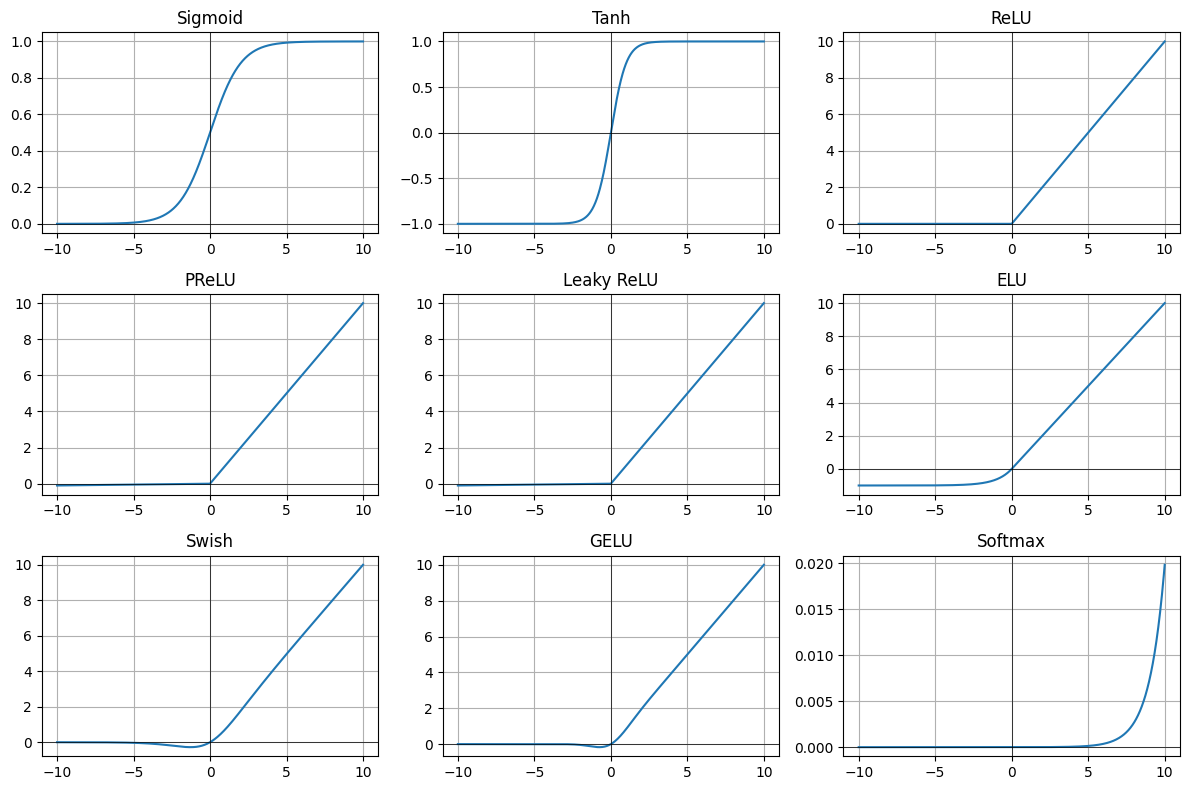

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def prelu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)
# Leaky ReLU is a special case of PReLU where the slope for negative values is fixed
# while PReLU learns the optimal slope during training.

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Input range
x = np.linspace(-10, 10, 1000)

# Dictionary of functions
functions = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'PReLU': prelu,
    'Leaky ReLU': leaky_relu,
    'ELU': elu,
    'Swish': swish,
    'GELU': gelu,
    'Softmax': softmax
}
# Note: Softmax is typically used for multi-class classification and is not applied element-wise like the others.

# Plot
plt.figure(figsize=(12, 8))
for i, (name, func) in enumerate(functions.items()):
    plt.subplot(3, 3, i+1)
    y = func(x)
    plt.plot(x, y, label=name)
    plt.title(name)
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.tight_layout()

plt.show()
